## Formatter texte

In [1]:
import json
import pandas as pd

with open('../subset/subset.json') as f:
    data = json.load(f)

In [101]:
def get_docs_from_id(id):
    docs = []
    for o in data:
        if o['document_type_id'] == id:
            docs.append(o)
    return docs

datas = get_docs_from_id(8)

## De base

In [102]:
for doc in datas:
    keys = list(doc.keys())
    keys.pop()
    keys.pop()
    for key in keys:
        lines = doc[key]
        for line in lines:
            text = ''
            words = line['line']['words']
            for w in words:
                text += w['text'] + ' '
            print(text)
    break

From BIOGROUP-LCD 
mer. 25 sept. 2019 08:59:25 CEST 
Page 1 of 2 
LABORATOIRE DE BIOLOGIE MEDICALE 
ORDENER 
Agrément : 93-197, Bio Lam LCD SELAS RCS : 414 230 060 
81, rue Ordener - 75018 PARIS 
Tél. : 01 46 06 42 57 
Fax : 01 46 06 99 77 Mail: labo.ordener@biogroup-icd.fr 
Laboratoire ouvert du LUNDI au VENDREDI de 7h00 à 19h00 et le SAMEDI de 7h30 à 12h30 
DR M. NGUYEN 
DR M. MIHOUBI 
BIOLOGISTE MEDICAL 
BIOLOGISTE MEDICAL 
F 
Madame Bègue Paulette 
IPSO SANTE 
né(e) Bègue 
73 RUE DE MONTREUIL 
32 BIS RUE D'ORSEL 
75011 PARIS 
75018 PARIS 
No: 
Dossier du 24/09/19-A-0048# 
Enregistré à 09H32 
Le mercredi 25 septembre 2019 
Patient sexe Féminin né(e) le 11/05/1989 
Email Patient : paulclerc@example.net 
COMPTE RENDU D'ANALYSES DE BIOLOGIE MEDICALE 
Prélèvement effectué le 24/09/19 à 09H42 sous réserve de mention contraire. 
Information : 
Coordonnées complémentaires du prescripteur : 
Nom : DR ROZE MATHILDE 
Service de GYNECOLOGIE 
Tél NC 
Microbiologie 
Valeurs de référence 
Antério

## Arrondi

In [6]:
def abs(a, b):
    r = a - b
    if r < 0:
        return -r
    return r

print(abs(0.385, 0.382) < 0.1)

True


In [103]:
def regrouper_mots_par_hauteur(doc, tolerance):
    mots_regroupes = {}  # Dictionnaire pour stocker les groupes de mots
    
    keys = list(doc.keys())
    keys.pop()
    keys.pop()
    for key in keys:
        lines = doc[key]
        for line in lines:
            for w in line['line']['words']:
                hauteur = w['top']
                found = False
                for h in mots_regroupes:
                    if abs(h, hauteur) <= tolerance:
                        found = True
                        mots_regroupes[h].append(w['text'])
                        break
                if found == True:
                    continue
                if hauteur not in mots_regroupes:
                    mots_regroupes[hauteur] = []
                mots_regroupes[hauteur].append(w['text'])
    return mots_regroupes

tolerance = 0.02
for doc in datas:
    resultat = regrouper_mots_par_hauteur(doc, tolerance)
    break

# Afficher les groupes de mots
for hauteur, mots in resultat.items():
    print(mots)
        


['From', 'BIOGROUP-LCD', 'mer.', '25', 'sept.', '2019', '08:59:25', 'CEST', 'Page', '1', 'of', '2', 'From', 'BIOGROUP-LCD', 'mer.', '25', 'sept.', '2019', '08:59:25', 'CEST', 'Page', '2', 'of', '2']
['LABORATOIRE', 'DE', 'BIOLOGIE', 'MEDICALE', 'Demande', 'n°', '24/09/19-A-0048', 'ME', 'Bègue', 'Paulette', 'né(e)', 'Bègue', 'le', '11/05/1989']
['ORDENER', 'Agrément', '93-197,', 'Bio', 'Lam', 'LCD', 'SELAS', 'RCS', '414 230 060', 'Uroculture', ':', 'Stérile', 'Previ-isola', 'ou', 'WASP,', 'Biomérieux:', 'ensemencement', 'automatisé', '(Urine)', 'sur', 'chromID', 'CPSE', 'elite,', 'Biomérieux']
[':', ':', '81,', 'rue', 'Ordener', '-', '75018', 'PARIS']
['Tél.', ':', '01 46 06 42 57', 'Fax', ':', '01 46 06 99 77', 'Mail:', 'labo.ordener@biogroup-icd.fr', 'Commentaire(s)', 'interprétatif(s)', ':']
['Laboratoire', 'ouvert', 'du', 'LUNDI', 'au', 'VENDREDI', 'de', '7h00', 'à', '19h00', 'et', 'le', 'SAMEDI', 'de', '7h30', 'à', '12h30', 'Absence', "d'arguments", 'biologiques', 'en', 'faveur', "

lieu 0.1522073894739151 Leduc 0.13511599600315094
Prénom 0.1662253588438034 Maryse 0.15754753351211548

In [96]:
abs(0.1522073894739151, 0.13511599600315094)

0.01709139347076416

In [97]:
abs(0.1662253588438034, 0.15754753351211548)

0.008677825331687927

In [76]:
0.008677825331687927 < 0.01

True

In [80]:
abs(0.2008913904428482, 0.25213339924812317)

0.05124200880527496

## Visualisation graphique

In [3]:
import json
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt

def get_font_size(text, font_path, desired_width):
    min_size, max_size = 7, 40  # reasonable range for fontsize
    while max_size - min_size > 1:
        font_size = (min_size + max_size) // 2
        font = ImageFont.truetype(font_path, font_size)
        if font.getsize(text)[0] > desired_width:
            max_size = font_size
        else:
            min_size = font_size
    return ImageFont.truetype(font_path, min_size)

/tmp/ipykernel_4533/689991605.py:10: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  if font.getsize(text)[0] > desired_width:


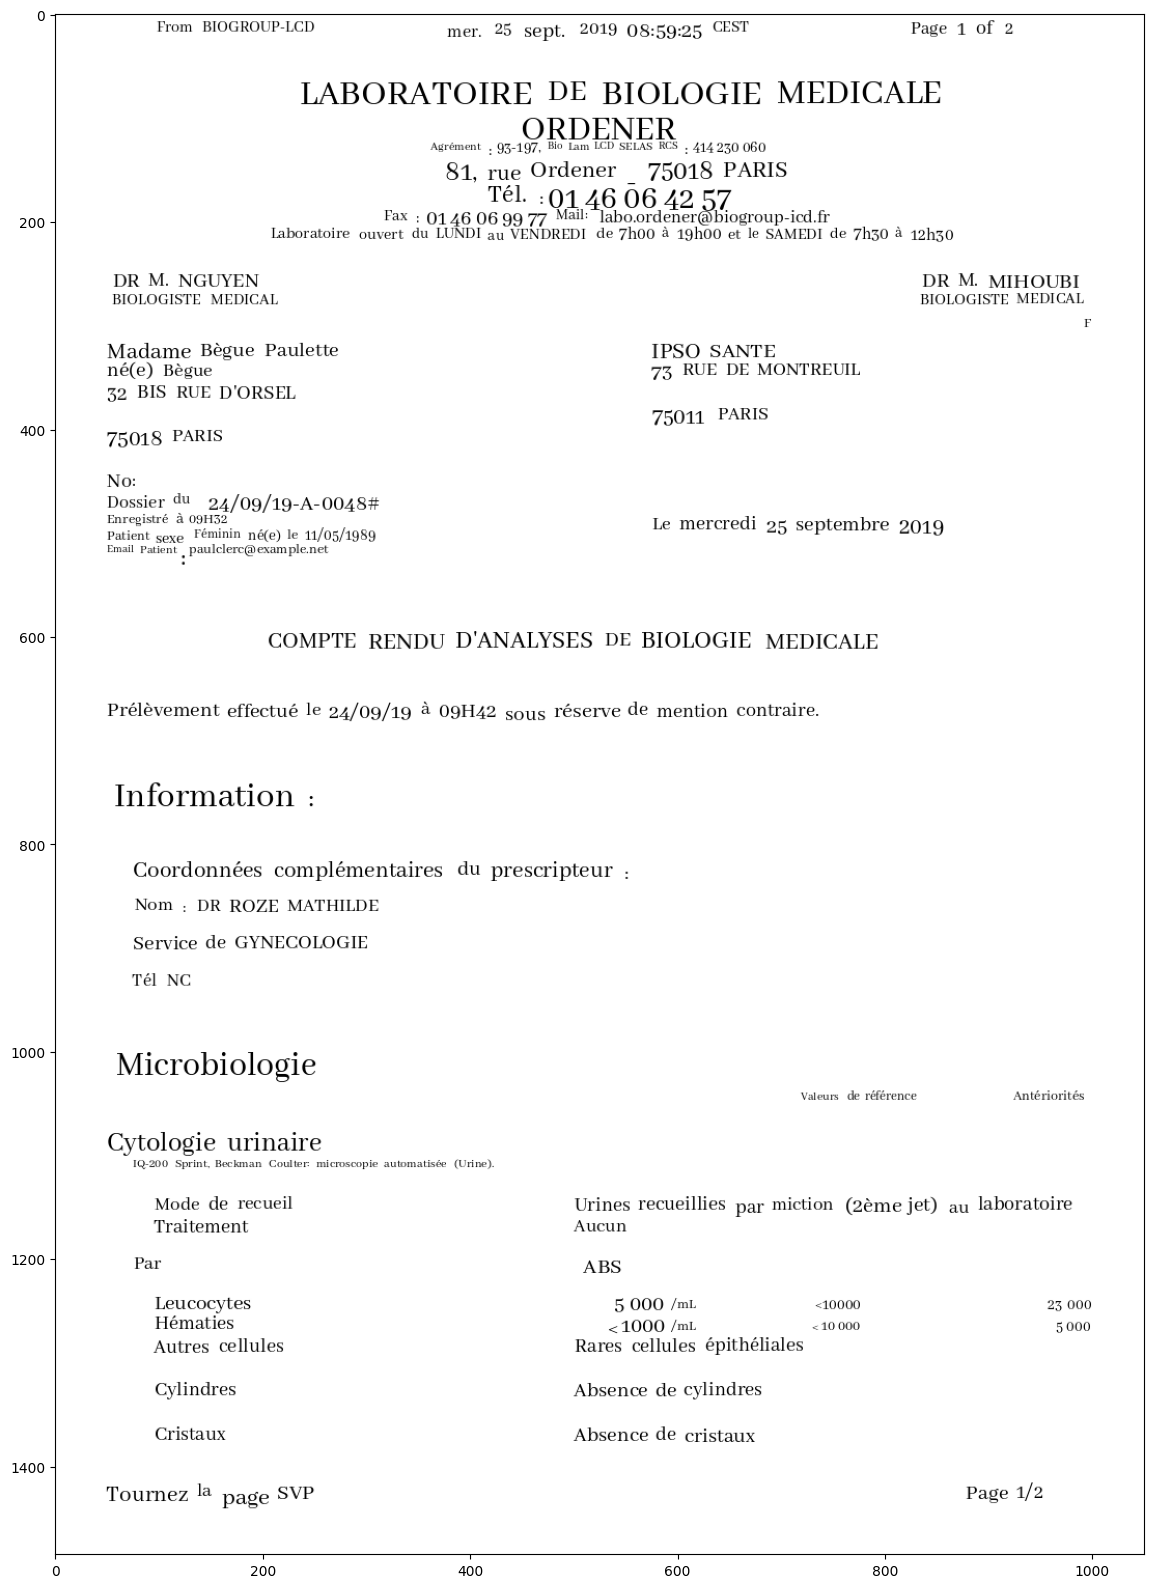

In [104]:
page_0 = datas[0]['0']
width, height = 210 *5, 297*5

####
# put the following code in an other cell to not reload full dataset each time
####
# path of .ttf
font_path = "../AbhayaLibre-Regular.ttf"


# create a new image with white background
blank_image = Image.new('RGB', (width, height), 'white')
# get a drawing context
d = ImageDraw.Draw(blank_image)
for line in page_0:
    if line['line']['confidence'] > 50:
        for word in line['line']['words']:
            (x, y, w, h) = (word['left']*width, word['top']*height, word['width']*width, word['height']*height)
            text = word["text"]
            d.text((x, y), text, font=get_font_size(text, font_path, w), fill=(0, 0, 0))

# can locally save the page with following line:
# blank_image.save("output_image.png")
plt.figure(figsize=(40,20))
plt.imshow(blank_image)
plt.savefig('test.png')